PyTorch is a library in Python which provides tools to build deep learning models. What python does for programming PyTorch does for deep learning. Python is a very flexible language for programming and just like python, the PyTorch library provides flexible tools for deep learning. If we are learning deep learning or looking to start with it, then the knowledge of PyTorch will help a lot in creating our deep learning models.

It has proven to be one of the most flexible and stronger tools to work with real-world problems by providing a higher level of performance. PyTorch provides a deep data structure known as a tensor, which is a multidimensional array that facilitates many similarities with the NumPy arrays.

### Why PyTorch for Deep Learning?
As we know deep learning allows us to work with a very wide range of complicated tasks, like machine translations, playing strategy games, objects detection, and many more. With PyTorch, we can perform these complex tasks in very flexible ways. Now let’s understand PyTorch more by working on a real-world example.

### Training a Classifier with PyTorch
We will do the following steps in order to work on the Image Classification with PyTorch:

1. Load and normalizing the CIFAR10 training and test datasets using torchvision
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data
6. Loading and normalizing CIFAR10.

Using torchvision, it’s very easy to load CIFAR10:

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range `[0, 1]`. We transform them to Tensors of normalized range `[-1, 1]`.

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data


In [19]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


In [8]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Now let’s have a look at some of our training images:

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [10]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

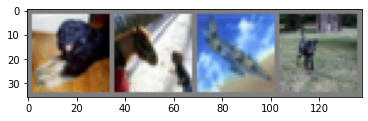

  dog horse plane   dog


In [11]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Now, let’s define a Convolutional Neural Network using PyTorch:

In [12]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Now we will define a loss function using a Classification cross-Entropy loss and SGD with momentum:

In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Now, lets train the Neural Network. Here we will simply loop over our data iterator, and feed the inputs to the neural network to optimize classification:

In [14]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 2.157
[1,  4000] loss: 1.870
[1,  6000] loss: 1.684
[1,  8000] loss: 1.575
[1, 10000] loss: 1.489
[1, 12000] loss: 1.413
[2,  2000] loss: 1.363
[2,  4000] loss: 1.346
[2,  6000] loss: 1.330
[2,  8000] loss: 1.304
[2, 10000] loss: 1.271
[2, 12000] loss: 1.261
Finished Training


Now, before moving forward let’s quickly save our model:

In [16]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Now, lets test our trained Neural Network on the test data. But we need to check if the network has learnt anything at all. We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

In [20]:
dataiter = iter(testloader)
images, labels = dataiter.next()

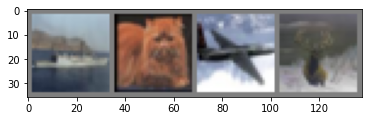

GroundTruth:   ship   cat plane  deer


In [21]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Now let’s load our saved model:

In [22]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Okay, now let us see what our trained neural network thinks these examples above are:

In [23]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   ship   dog plane  deer


Now, lets have a look at the accuracy of our trained neural network:

In [24]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


Accuracy of the network on the 10000 test images: 54 %

Now, lets look deeply on this accuracy rate, we want to see here what classes performed well and what not. We mean to say let’s have a look at the classes which contributed the most and least on this accuracy rate:

In [25]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 49 %
Accuracy of   car : 69 %
Accuracy of  bird : 35 %
Accuracy of   cat : 28 %
Accuracy of  deer : 48 %
Accuracy of   dog : 52 %
Accuracy of  frog : 83 %
Accuracy of horse : 59 %
Accuracy of  ship : 72 %
Accuracy of truck : 66 %
